Imports for Machine Learning

In [11]:
import pandas as pd
import numpy as np
import joblib 

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error, median_absolute_error, max_error, explained_variance_score

# For visualizing results later
import matplotlib.pyplot as plt
import seaborn as sns

print("ML Libraries loaded.")

ML Libraries loaded.


Load the Cleaned Data

In [12]:
# Load data
df_clean = pd.read_csv('cleaned_agricultural_data.csv')

# Separate Features (Input) and Target (Output)
X = df_clean.drop('Yield_tons_per_hectare', axis=1)
y = df_clean['Yield_tons_per_hectare']

print("Data Loaded.")
print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

Data Loaded.
Features (X) shape: (999769, 9)
Target (y) shape: (999769,)


Build the Preprocessing Pipeline

In [13]:
# 1. Define column groups
categorical_features = ['Region', 'Soil_Type', 'Crop', 'Weather_Condition']
numerical_features = ['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest']
# Note: Fertilizer and Irrigation are already 0/1, so we don't need to touch them.

# 2. Create the Transformer
# - Numerical columns -> Standard Scaler (makes them comparable)
# - Categorical columns -> OneHotEncoder (turns text to vectors)
# - Remainder -> 'passthrough' (keeps Fertilizer/Irrigation as they are)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='passthrough' 
)

print("Preprocessing pipeline defined.")

Preprocessing pipeline defined.


Split Data and Train Model

In [14]:
# 1. Split data (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Create the Full Pipeline (Preprocessor + Model)
# n_jobs=-1 uses all your CPU cores to speed up training
# max_depth=20 prevents the model from getting too large (good for 1M rows)
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=20, 
                                        max_depth=20, 
                                        random_state=42, 
                                        n_jobs=-1))
])

# 3. Train the model
print("🚀 Training started... (This may take 1-2 minutes)")
model_pipeline.fit(X_train, y_train)
print("✅ Training complete!")

🚀 Training started... (This may take 1-2 minutes)
✅ Training complete!


Model Evaluation

In [15]:
# Predict on the test set
y_pred = model_pipeline.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("--- Model Performance ---")
print(f"Mean Absolute Error (MAE): {mae:.3f} tons/hectare")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R² Score (Accuracy): {r2:.3f}")

# Interpretation
if r2 > 0.8:
    print("🌟 Great model! High accuracy.")
elif r2 > 0.5:
    print("👍 Good model, but could be improved.")
else:
    print("⚠️ Model needs improvement (Check data quality).")

--- Model Performance ---
Mean Absolute Error (MAE): 0.410 tons/hectare
Root Mean Squared Error (RMSE): 0.513
R² Score (Accuracy): 0.908
🌟 Great model! High accuracy.


In [16]:
# Calculate advanced metrics
mape = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print("--- Advanced Diagnostics ---")
print(f"MAPE (Percentage Error): {mape * 100:.2f}%")
print(f"MedAE (Typical Error):   {medae:.3f} tons/hectare")
print(f"Max Error (Worst Case):  {max_err:.3f} tons/hectare")
print(f"Explained Variance:      {evs:.3f}")

print("\n--- Interpretation ---")
print(f"On average, the model's predictions are off by {mape*100:.1f}%.")
print(f"In the worst case scenario, the prediction was off by {max_err:.1f} tons.")

--- Advanced Diagnostics ---
MAPE (Percentage Error): 12.08%
MedAE (Typical Error):   0.346 tons/hectare
Max Error (Worst Case):  2.485 tons/hectare
Explained Variance:      0.908

--- Interpretation ---
On average, the model's predictions are off by 12.1%.
In the worst case scenario, the prediction was off by 2.5 tons.


Visualizing Predictions vs Actuals

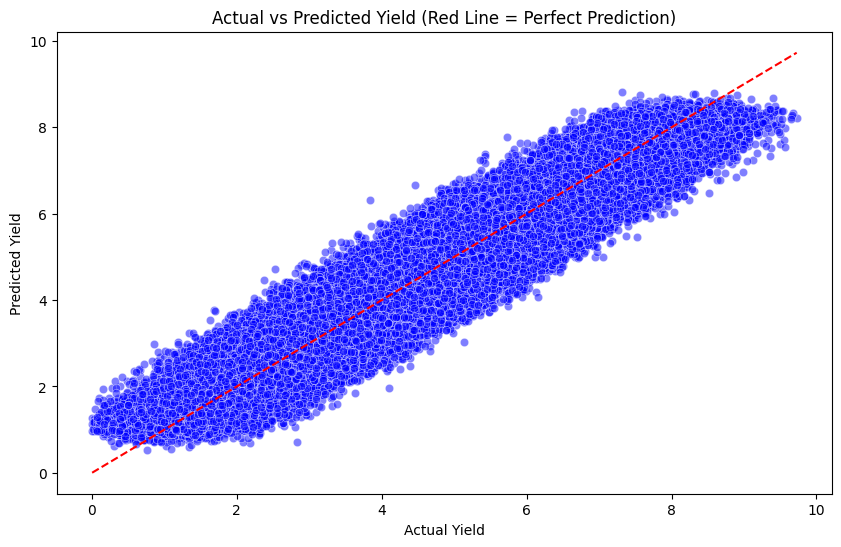

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='blue')

# Draw a red line for perfect predictions
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted Yield (Red Line = Perfect Prediction)')
plt.show()

Save the Model

In [18]:
# Save the model
joblib.dump(model_pipeline, 'yield_prediction_model.pkl')
print("Model saved as 'yield_prediction_model.pkl'")

Model saved as 'yield_prediction_model.pkl'
